In [10]:
import matplotlib.pyplot as plt
import spotiphy
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import importlib as imp
import cv2 as cv
imp.reload(spotiphy.segmentation)

<module 'spotiphy.segmentation' from 'C:\\Users\\zzheng92\\Desktop\\Spotiphy\\spotiphy\\segmentation.py'>

In [11]:
img = cv.imread('Results/Sample figure/sample.png')[:, :, [2, 1, 0]]
spot_centers = np.zeros((5, 2))
Segmentation = spotiphy.segmentation.Segmentation(img, spot_centers, out_dir='Results/Sample figure/segmentation/',
                                                  n_tiles=(1, 1, 1))
Segmentation.segment_nucleus(save=True)
n_cell_df = Segmentation.n_cell_df

Suppress the output of tensorflow prediction for tensorflow version 2.12.0>=2.9.0.
Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


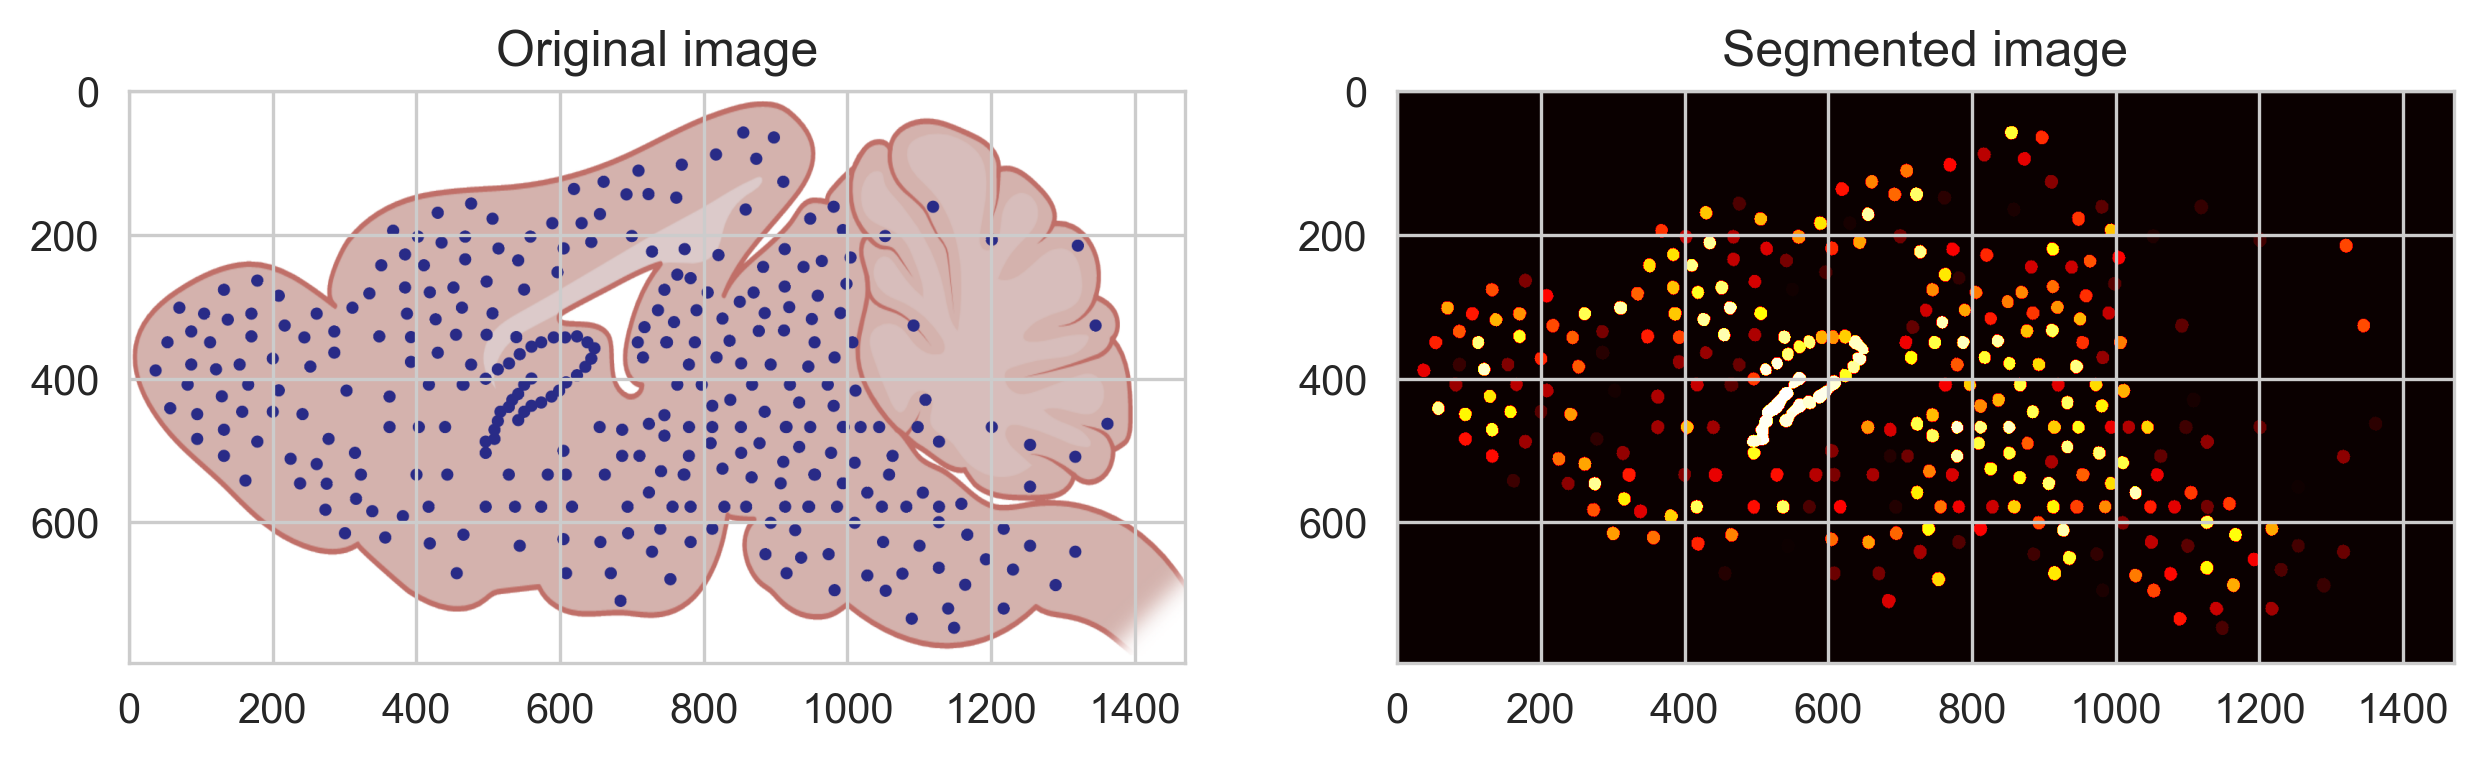

In [12]:
Segmentation.plot(save=True, path='Results/Sample figure/segmentation/segmentation_sample.jpg')

In [5]:
search_direction = [[1, 0], [0, 1], [-1, 0], [0, -1], [2, 0], [0, 2], [-2, 0], [0, -2], [1, 1], [-1, 1], [-1, -1], [1, -1]]
nucleus_center = Segmentation.nucleus_df[['x', 'y']].values
d = spotiphy.segmentation.cell_boundary(nucleus_center, img.shape[:2], max_dist=25, max_area=1200, 
                                        search_direction=search_direction, verbose=1)

r: 1	There are 305 nuclei left.
r: 2	There are 305 nuclei left.
r: 3	There are 305 nuclei left.
r: 4	There are 305 nuclei left.
r: 5	There are 305 nuclei left.
r: 6	There are 305 nuclei left.
r: 7	There are 305 nuclei left.
r: 8	There are 305 nuclei left.
r: 9	There are 305 nuclei left.
r: 10	There are 305 nuclei left.
r: 11	There are 305 nuclei left.
r: 12	There are 305 nuclei left.
r: 13	There are 305 nuclei left.
r: 14	There are 305 nuclei left.
r: 15	There are 305 nuclei left.
r: 16	There are 305 nuclei left.
r: 17	There are 305 nuclei left.
r: 18	There are 305 nuclei left.
r: 19	There are 305 nuclei left.
r: 20	There are 305 nuclei left.
r: 21	There are 170 nuclei left.
r: 22	There are 103 nuclei left.
r: 23	There are 64 nuclei left.
r: 24	There are 50 nuclei left.
r: 25	There are 45 nuclei left.


100%|██████████| 796/796 [00:16<00:00, 47.55it/s]


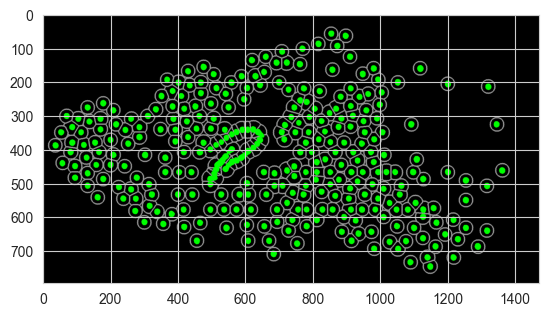

In [8]:
img_seg = Segmentation.label.copy()
cell_boundary = d['cell_boundary']
for i in range(len(cell_boundary)):
    for j in range(len(cell_boundary[0])):
        if img_seg[i, j] > 0:
            cell_boundary[i, j] = [0, 255, 0]
plt.imshow(cell_boundary)

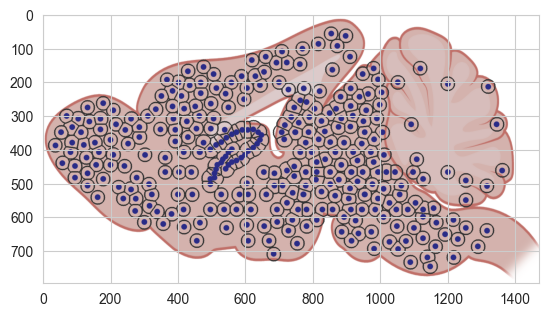

In [9]:
img1 = spotiphy.segmentation.add_boundary(img, d['cell_boundary'])
plt.imshow(img1)

In [13]:
Segmentation.nucleus_df

,x,y,in_spot
0,1254,492,False
1,544,632,False
2,1254,550,False
3,550,276,False
4,302,416,False
...,...,...,...
300,514,460,False
301,508,472,False
302,510,484,False
303,540,422,False
